**Waste Management Using CNN**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
import kagglehub

path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)



100%|██████████| 427M/427M [00:02<00:00, 154MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [4]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
x_data = []
y_data = []
for category in glob(train_path + '/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image' : x_data, 'label' : y_data})

100%|██████████| 12565/12565 [00:09<00:00, 1299.36it/s]


In [7]:
data['image']

,image
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,"[[[221, 220, 192], [221, 220, 192], [221, 220,..."
2,"[[[127, 125, 128], [128, 126, 129], [128, 126,..."
3,"[[[250, 244, 248], [249, 243, 247], [249, 243,..."
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...
22559,"[[[231, 223, 234], [232, 224, 235], [233, 225,..."
22560,"[[[94, 154, 4], [100, 159, 7], [109, 166, 11],..."
22561,"[[[5, 5, 5], [6, 6, 6], [6, 6, 6], [6, 6, 6], ..."
22562,"[[[225, 225, 223], [239, 239, 237], [242, 242,..."


In [8]:
data['label']

,label
0,R
1,R
2,R
3,R
4,R
...,...
22559,O
22560,O
22561,O
22562,O


In [9]:
data.shape

(22564, 2)

In [10]:
data.head()

,image,label
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",R
1,"[[[221, 220, 192], [221, 220, 192], [221, 220,...",R
2,"[[[127, 125, 128], [128, 126, 129], [128, 126,...",R
3,"[[[250, 244, 248], [249, 243, 247], [249, 243,...",R
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",R


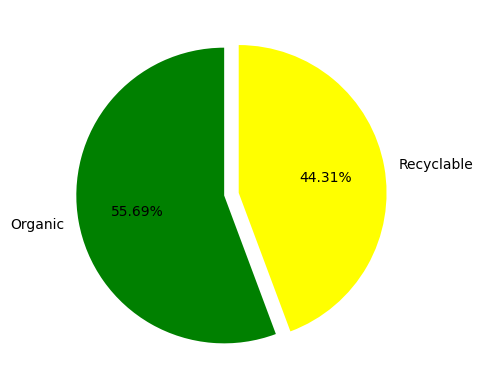

In [11]:
colors = ['green','Yellow']
plt.pie(data.label.value_counts(),labels = ['Organic','Recyclable'],autopct = '%0.2f%%',colors = colors,startangle=90,explode=[0.05,0.05])
plt.show()

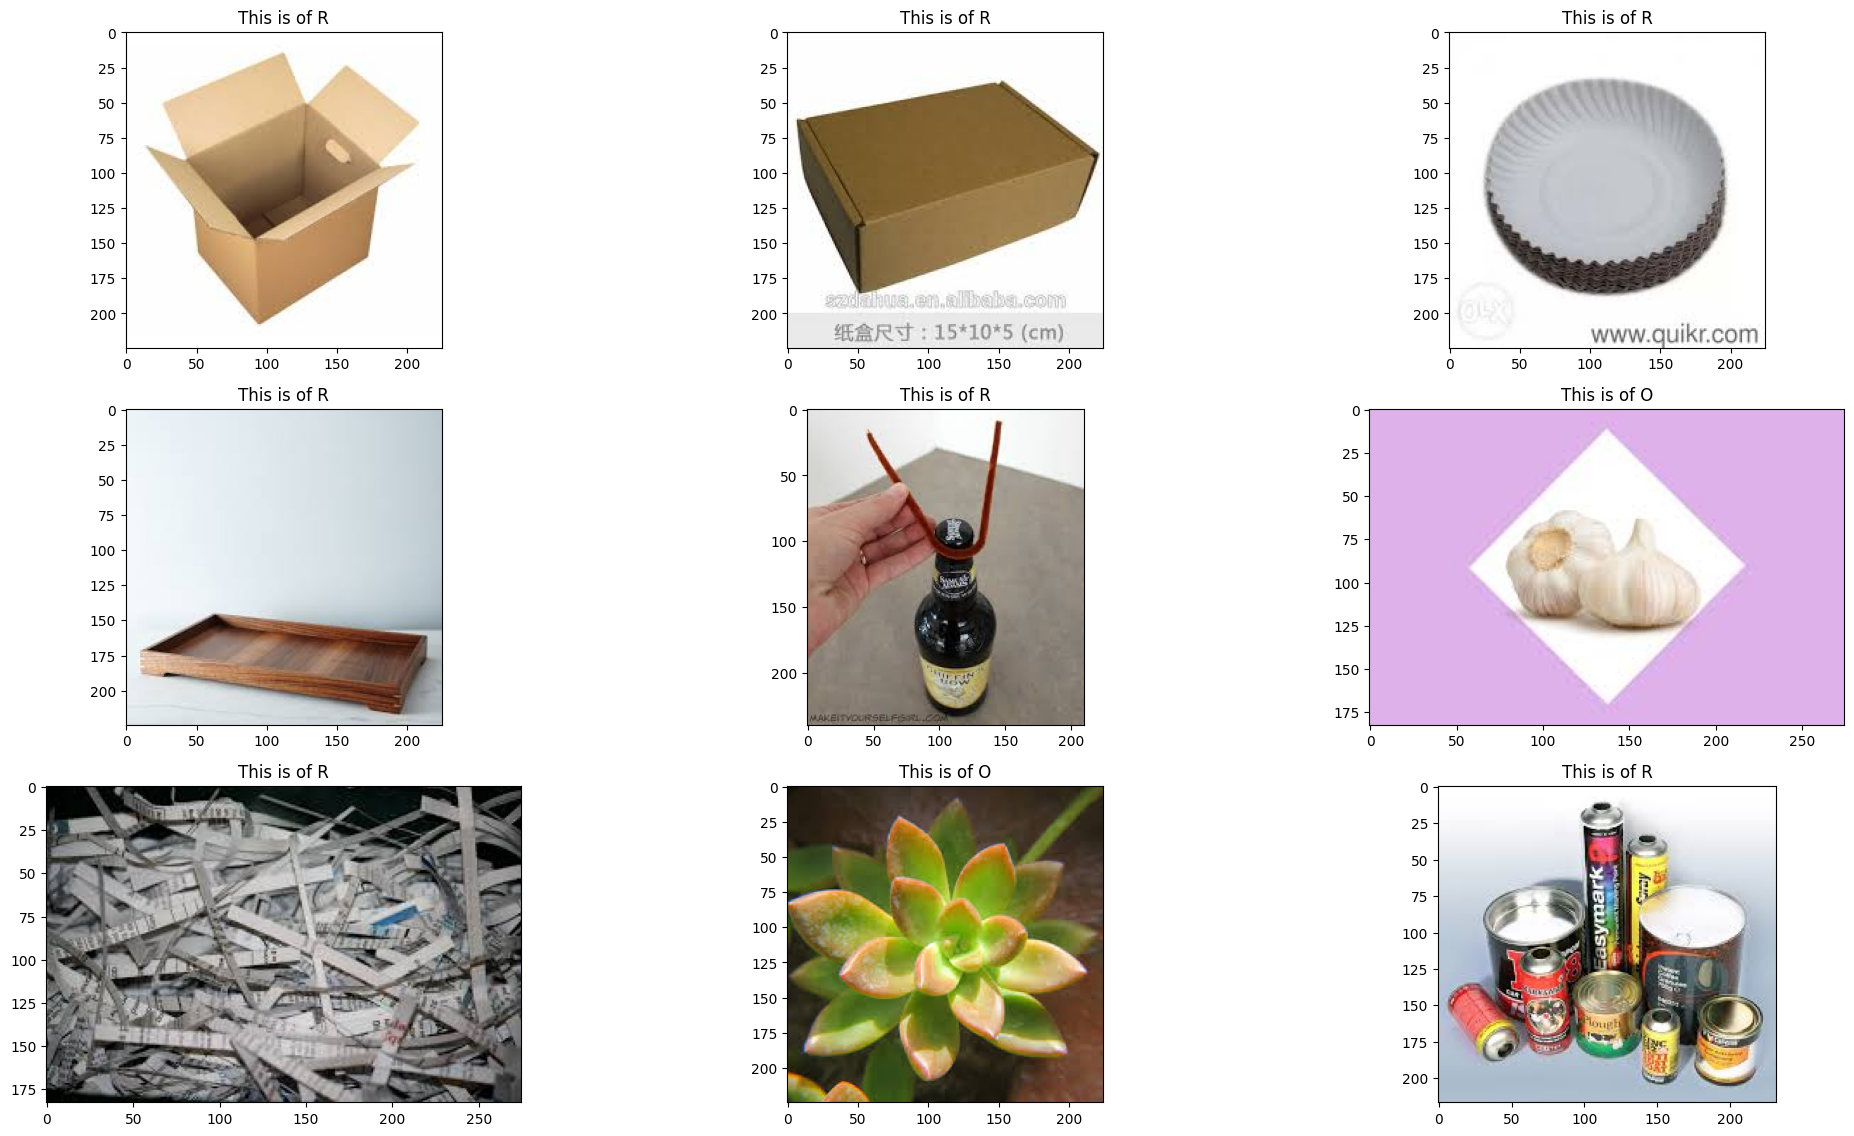

In [12]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 64

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [18]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)

Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 74s 179ms/step - accuracy: 0.7742 - loss: 0.5187 - val_accuracy: 0.8237 - val_loss: 0.4178
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 51s 143ms/step - accuracy: 0.8444 - loss: 0.3857 - val_accuracy: 0.8615 - val_loss: 0.3182
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 51s 144ms/step - accuracy: 0.8563 - loss: 0.3469 - val_accuracy: 0.9021 - val_loss: 0.2448
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 49s 138ms/step - accuracy: 0.8709 - loss: 0.3292 - val_accuracy: 0.9113 - val_loss: 0.2333
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.8875 - loss: 0.2802 - val_accuracy: 0.8762 - val_loss: 0.3095
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 53s 148ms/step - accuracy: 0.9045 - loss: 0.2428 - val_accuracy: 0.8961 - val_loss: 0.2726
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.9258 - loss: 0.1959 - val_accuracy: 0.8949 - val_loss: 0.3242
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 147ms/step - accuracy: 0.9446 - loss: 0

In [18]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label=' Validation Accuracy')
plt.legend()
plt.show()

In [18]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [19]:
def predict_fun(img):
  plt.figure(figsize=(6, 4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print('The image shown is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step
The image shown is Organic Waste


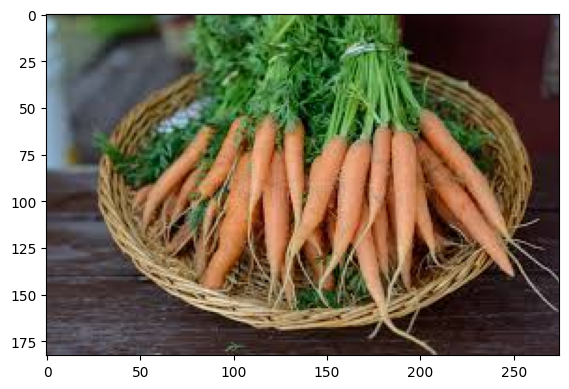

In [20]:
test_img = cv2.imread('/content/O_12747.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
The image shown is Organic Waste


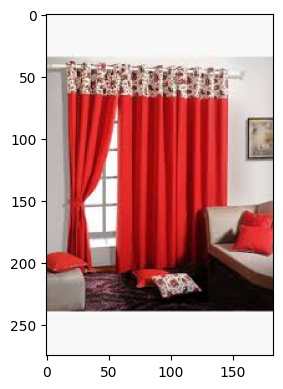

In [22]:
test_img = cv2.imread('/content/R_10148.jpg')
predict_fun(test_img)